# Стратегия взаимодейсвия с клиентами сети фитнес-центров «Культурист-датасаентист»

## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

**Задача**:
- спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1) выделить целевые группы клиентов;
    
    2) предложить меры по снижению оттока;
    
    3) определить другие особенности взаимодействия с клиентами.

## Описание данных
# Файл: /datasets/gym_churn.csv

Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

**Данные клиента за предыдущий до проверки факта оттока месяц:**

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент  в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

## Загрузка изучение данных

Загрузим нужные библиотеки, которые понадобятся при дальнейшей работе:

In [1]:
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

pd.options.display.expand_frame_repr = False
import warnings
warnings.filterwarnings('ignore')  

Прочитаем файлы:

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
display(df.head(10))
df.info()
df.isna().sum()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Посчитаем количество дубликатов

In [3]:
df.duplicated().sum()

0

Приведем названия столбцов к нижнему регистру

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Округлим данные со средним значением до сотых

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
display(df.head())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


Значения столбца month_to_end_contract приведем к целочисленному типу данных 

In [6]:
df.month_to_end_contract = df.month_to_end_contract.astype(np.int64)

# Вывод:
При первичном изучении аналитических данных фитнес-центра выяснилось, что пропущеные значения и дубликаты обнаружены не были, что упрощает дальнейшую работу с данными. Были проделаны дополнительные действия: названия столбцов были приведены к нижнему регистру, средние значения были округлены до сотых, значения столбца month_to_end_contract были приведены к целочисленному типу данных методом astype(), что позволит избежать искажения результатов дальнейшего исследования.

## Исследовательский анализ данных (EDA)

# EDA (exploratory data analysis) - первоначальный анализ данных

**Задачи:**
- оценить качество данных и объем необходимой работы по предобработке
- посмотреть на распределения и взаимные корреляции и выявить аномалии, если они есть
- сформулировать первые гипотезы относительно признаков или целевой переменной

### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,"4,000.00",0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,"4,000.00",0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,"4,000.00",0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,"4,000.00",0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,"4,000.00",0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,"4,000.00",4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,"4,000.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,"4,000.00",29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,"4,000.00",146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,"4,000.00",4.32,4.19,1.00,1.00,1.00,6.00,12.00


# Вывод:
По полученным данным:

- Распределение между мужчинами и женщинами одинаково
- Большинство клиентов (85%) живет или работает рядом с фитнес-центром
- Примерно половина клиентов являются сотрудниками партнерских организаций
- Около 30% клиентов пришли по программе "Приведи друга, что составляет довольно малую долю
- Мобильные номера записаны практически для всех клиентов
- Средняя длительность абонементов клиентов - разброс очень большой(стандратное отклонение)
- Около 40% клиентов посещают групповые занятия
- Средний возраст клиентов 29 лет
- Средние выручка с доп.услуг фитнес-центра - 146, максимальная выручка - 500
- Среднее время с момента первого обращения в фитнес-центр - 4 месяца
- Средняя частота посещений за все время - 1-2 раза в неделю
- Средняя частота посещений за последний месяц - 1-2 раза в неделю
- **Доля оттока - 27%**

Доля оттока составляет примерно 30%, это говорит о том, что эта проблема имеет место быть и с ней следует дальше разбираться.

### Средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался 

In [8]:
churn = df.groupby('churn').agg('mean')
churn.T

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


# Вывод:
По полученным данным делаем вывод, что 
- Распределение клиентов по полу не влияет на отток клиентов
- Наличие мобильного телефона также не влияет на отток
- Клиенты, пришедшие по акции "Приведи друга" в два раза меньше уходят в отток

***В отток попадают клиенты:***

- Живущие и работающие в других районах
- Сотрудники компаний, не входящие в партнерскую программу
- В среднем занимаются около месяца
- Редко посещают групповые тренировки

Можно предположить, что клиенты в оттоке живут или работают в других районах и им неудобно добираться до фитнес-центра, возможно они купили пробный абонемент по выгодным условиям, но из-за неудобства расположения, они вынуждены были перейти в другие фитнес-клубы.

Вторая гипотеза: Клиент, придя в фитнес-центр, купил пробный абонемент на месяц, в процессе занятий его не устроил ряд факторов, повлиявших на его решение поменять клуб. Также может не сработать маркетинг, удержание клиента на низком уровне, нет специальных предложений для новичков, акций/скидок, которые могли бы его заинтересовать для продолжения занятий именно в этом фитнес-клубе.



### Столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

#### Графики:

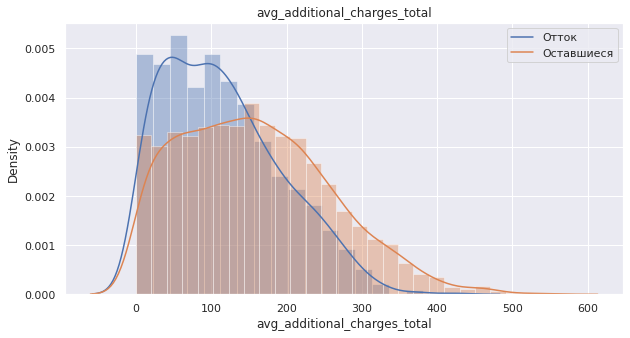

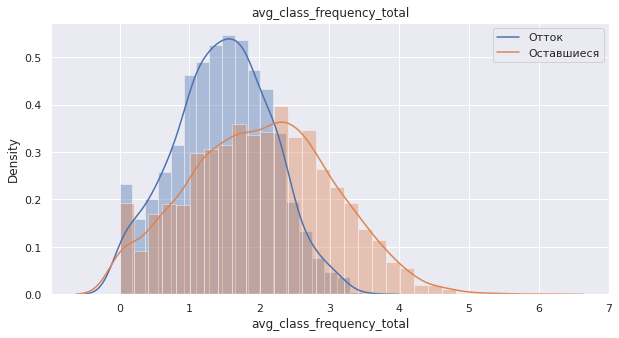

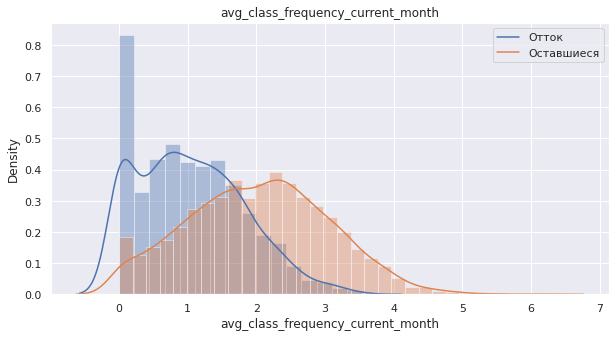

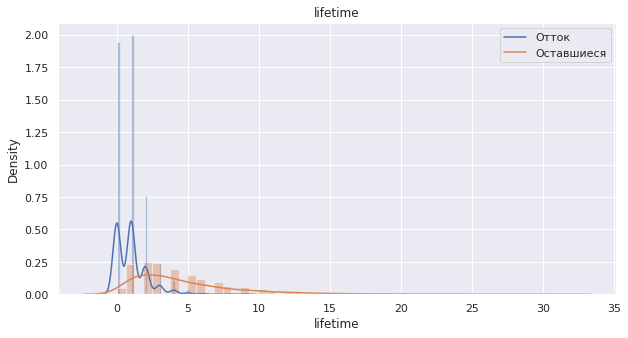

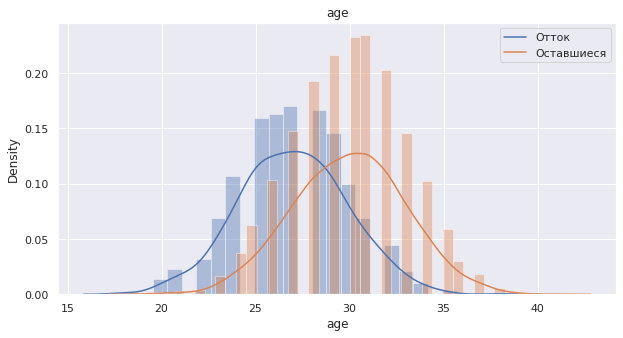

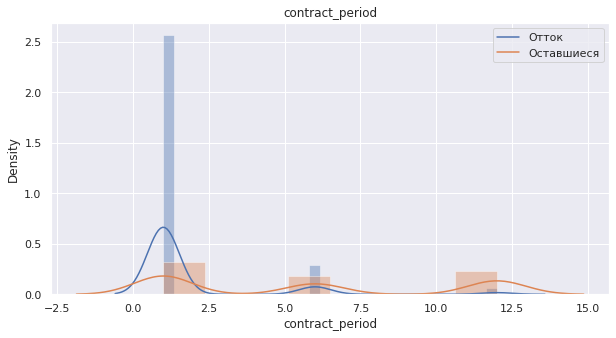

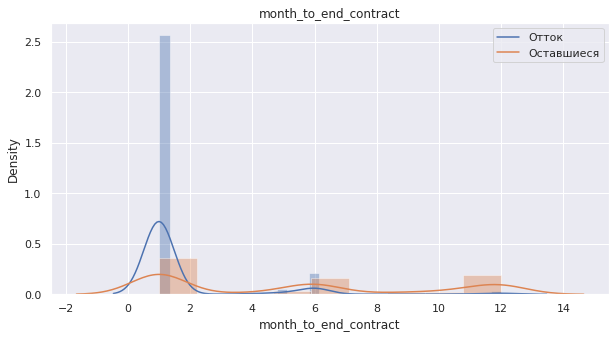

In [9]:
churn_1 = df[df['churn'] == 1]
churn_0 = df[df['churn'] == 0]

for column in ['avg_additional_charges_total', 'avg_class_frequency_total', 
               'avg_class_frequency_current_month', 'lifetime', 'age', 
               'contract_period', 'month_to_end_contract']:
    plt.figure(figsize = (10,5))
    sns.distplot(churn_1[column])
    sns.distplot(churn_0[column])
    plt.title(column)
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

#### Для бинарных признаков:

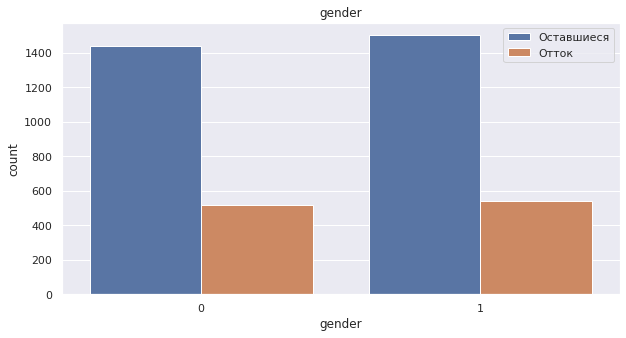

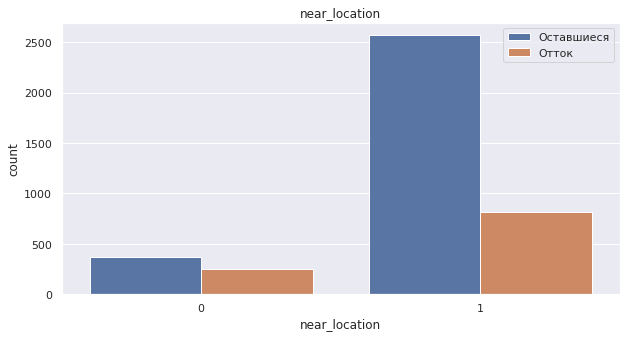

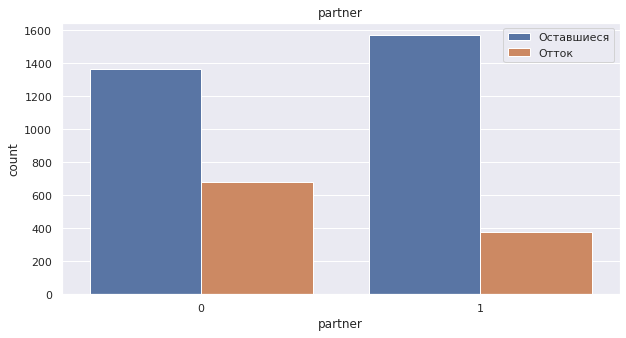

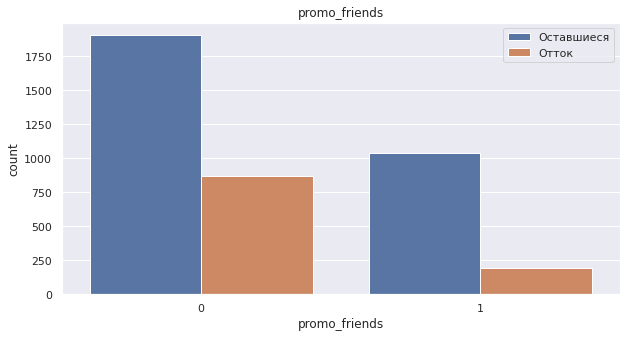

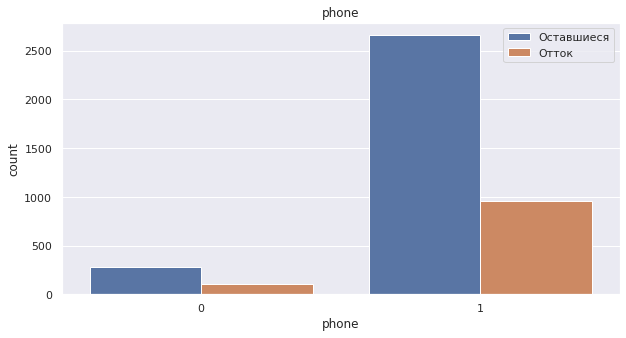

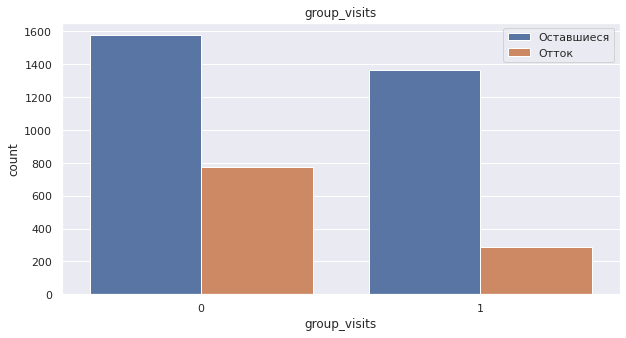

In [10]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(10, 5))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title(column)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

### Матрица корреляций

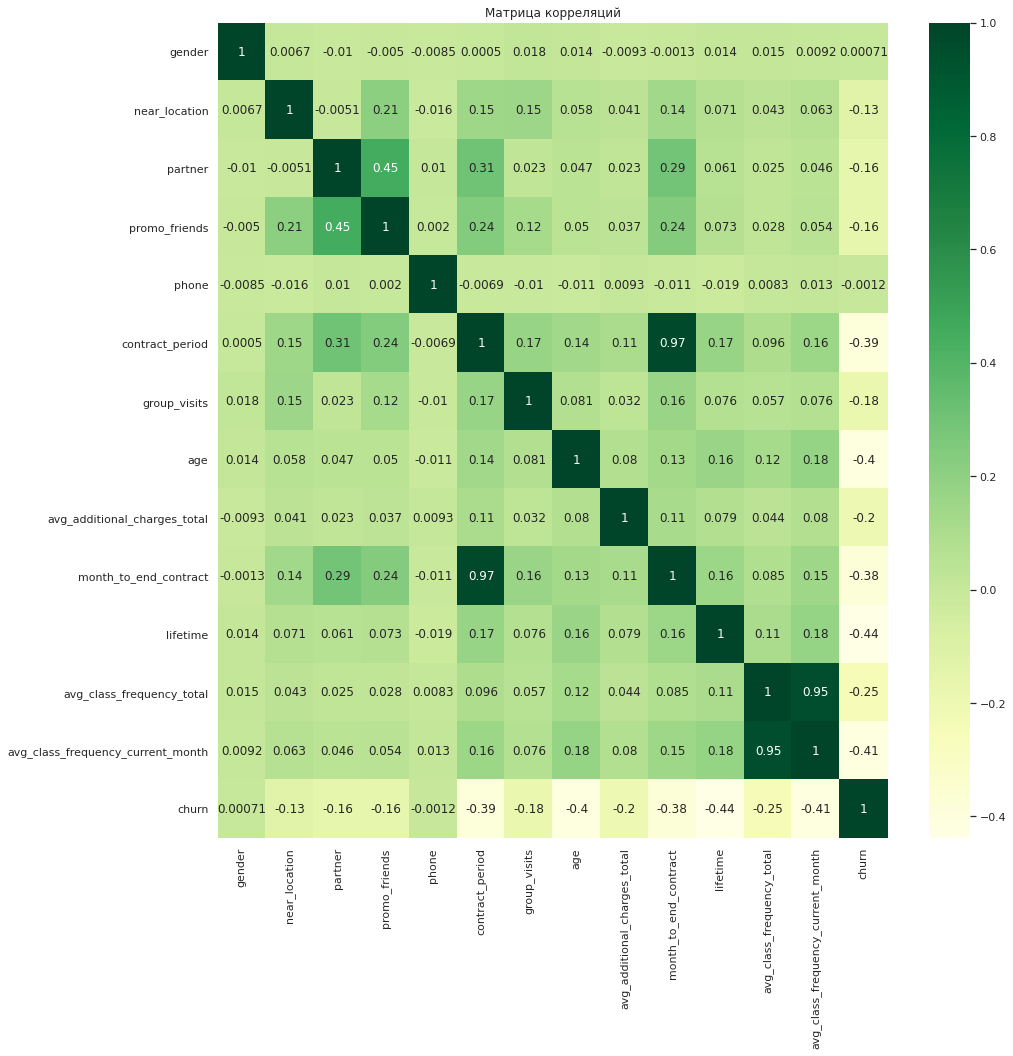

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, cmap = 'YlGn')
plt.title('Матрица корреляций')
plt.show()

# Вывод:
В ходе исследовательского анализа выяснилось, что мультиколлинеарные признаки - contract_period и month_to_end_contract, avg_class_frequency_current_month и avg_class_frequency_total. Также обнаружили признаки с нулевой корреляцией с целевой переменной -  phone и gender, они не влияют на отток клиентов фитнес-центра. Наиболее сильно влияют на отток: время с момента первого обращения в фитнес-центр, количество посещений в месяц, возраст, длительность текущего действующего абонемента, а также наличие скидок по партнерской программе а также участие в акции "Пригласи друга".Средний возраст клиентов составляет 29-30 лет, в отток попадают более молодые клиенты. 

Становится более ясен портрет клиента, попадающего в отток: это клиенты, которые берут пробный абонемент на месяц, редко посещают фитнес-центр (возможно это связано с неудобным режимом тренировок/неудобным расположением/отсутствием мотивации/неэффективным маркетингом), не посещают групповые занятия и которым не были предложены скидки по партнерской программе.

Избавимся от мультиколлинеарности, удалим из пары сильно коррелирующих признаков по одному признаку.

In [12]:
df.drop('avg_class_frequency_current_month', axis = 1, inplace = True)
df.drop('month_to_end_contract', axis = 1, inplace = True)
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,1,1,1,1,0,6,1,29,14.23,3,0.02,0
1,0,1,0,0,1,12,1,31,113.20,7,1.92,0
2,0,1,1,0,1,1,0,28,129.45,2,1.86,0
3,0,1,1,1,1,12,1,33,62.67,2,3.21,0
4,1,1,1,1,1,1,0,26,198.36,3,1.11,0


## Модель прогнозирования оттока клиентов

Построим модель **бинарной классификации** клиентов, где целевой признак — факт оттока клиента в следующем месяце

### Логистическая регрессия

Разделим наши данные на признаки (матрица X) и целевую переменную (y)

In [13]:
X = df.drop('churn', axis = 1)
y = df['churn']

Разделим модель на обучающую и валидационную выборку

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Зададим алгоритм для нашей модели

In [15]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100, n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Обучение модели

In [16]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

Сделаем прогнозы

In [17]:
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

Оценим полученные метрики

-  **Accuracy** - доля правильных ответов
-  **Precision и Recall** - точность и полнота
-  **F1** - учитывает баланс между метриками

In [18]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.88
Precision: 0.76
Recall: 0.77
F1: 0.77


# Вывод:
Алгоритм Логистическая регрессия при обучении показал довольно неплохие результаты, precision и recall близки к 100%, попробуем обучить модель с помощью алгоритма Случайный лес и посмотрим на его результаты.

### Случайный лес

Стандартизация данных

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [20]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0, class_weight='balanced') 
rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [21]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.89
Precision: 0.81
Recall: 0.75
F1: 0.78


# Вывод:
Алгоритм обучения Случайный лес показал более высокие результаты, хоть и незначительно отличающиеся от Логистической регрессии. Таким образом, алгоритм Случайный лес показал хорошие результаты при обучении.

## Кластеризация клиентов

Удалим столбец churn

In [22]:
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns
display(df_sс.head())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total
0,1,1,1,1,0,6,1,29,14.23,3,0.02
1,0,1,0,0,1,12,1,31,113.20,7,1.92
2,0,1,1,0,1,1,0,28,129.45,2,1.86
3,0,1,1,1,1,12,1,33,62.67,2,3.21
4,1,1,1,1,1,1,0,26,198.36,3,1.11


### Стандартизация данных

In [23]:
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns = df_columns_list).astype('float64')

### Дендограмма


In [24]:
linked = linkage(df_sс, method = 'ward')

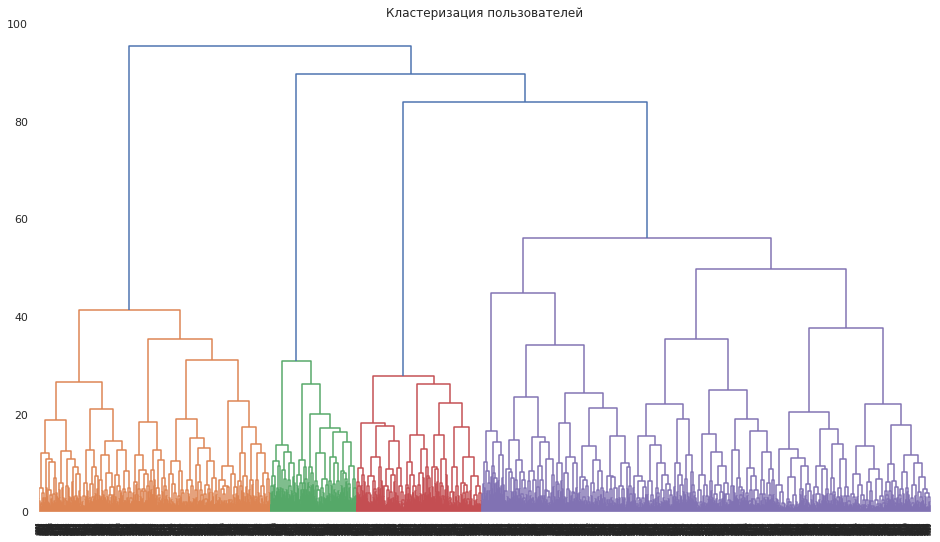

In [25]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

# Вывод:
По полученной дендограмме предположительно можно выделить 4-6 кластеров.

### Обучение модели кластеризации с помощью алгоритма K-Means и прогноз кластеров клиентов (число кластеров n=5)

In [26]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(df_sс)
df['cluster'] = labels

### Средние значения признаков для кластеров

In [34]:
df.groupby('cluster').agg('mean').T

cluster,0,1,2,3,4
gender,0.50,0.49,0.51,0.54,0.52
near_location,0.00,1.00,1.00,1.00,0.86
partner,0.49,0.96,0.24,0.25,0.47
promo_friends,0.08,0.89,0.06,0.08,0.31
phone,1.00,1.00,1.00,1.00,0.00
contract_period,3.03,7.66,2.82,4.53,4.78
group_visits,0.24,0.46,0.00,1.00,0.43
age,28.72,29.54,28.77,29.54,29.30
avg_additional_charges_total,137.54,155.86,143.38,148.09,144.21
lifetime,3.06,4.38,3.34,3.76,3.94


In [28]:
df.cluster.value_counts()

2    1132
1    1050
3     871
0     561
4     386
Name: cluster, dtype: int64

# Вывод:
Самым многочисленным является кластер под номером 3, на втором месте 4-ый кластер, на третьем месте 2-0й кластер.

**Кластер 0**
- Отток - 40% - самый высокий
- Живут или работают недалеко от фитнес-центра
- Реже всех посещают групповые занятия
- Только 8% пришли по акции "Приведи друга"
- Наименьшее кол-во посещений за всё время и в последний месяц

**Кластер 1**
- Отток - 12% - самый низкий
- Живут или работают недалеко от фитнес-центра
- Преобладают сотрудники компаний-партнеров - 96%
- Заключают абонементы на длительный срок - 8 месяцев
- Чаще всех посещают групповые занятия - 46%
- Больше всех пришли по акции "Приведи друга"



**Кластер 2**
- Отток - 38% 
- Живут или работают недалеко от фитнес-центра


**Кластер 3**
- Отток - 20% - самый высокий
- Только 8% пришли по акции "Приведи друга"
- В среднем длительность абонемента - 4 месяца

**Кластер 4**
- Отток - 27%
- Живут или работают недалеко от фитнес-центра
- Посещают клуб - 2 раза в неделю
- Абонементы заключаются в среднем на 5 месяцев

### Распределения признаков по кластерам

**Для бинарных признаков**

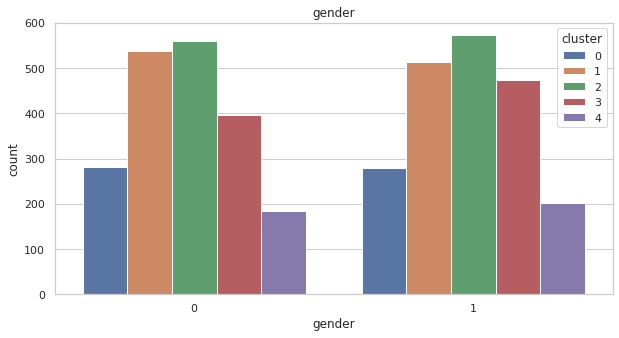

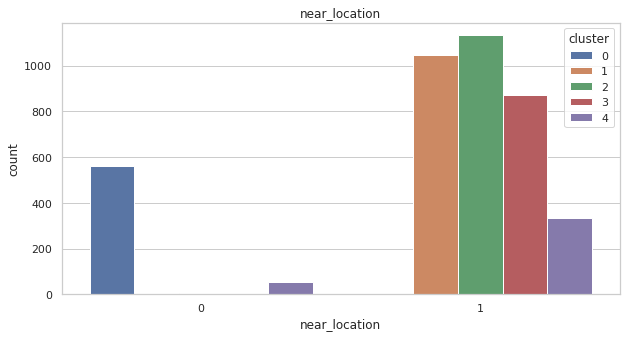

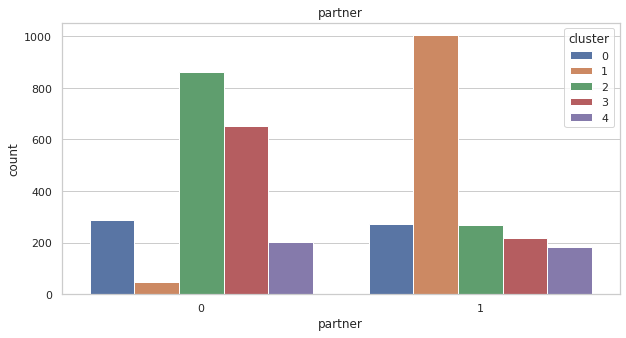

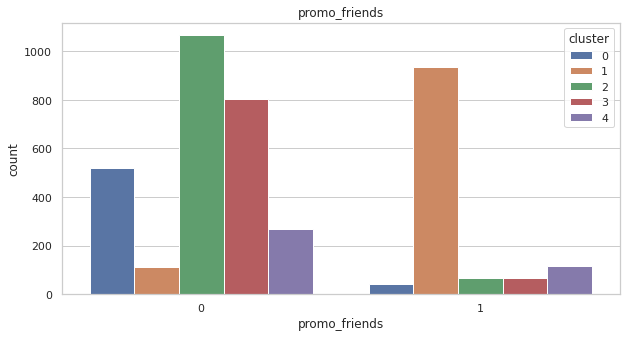

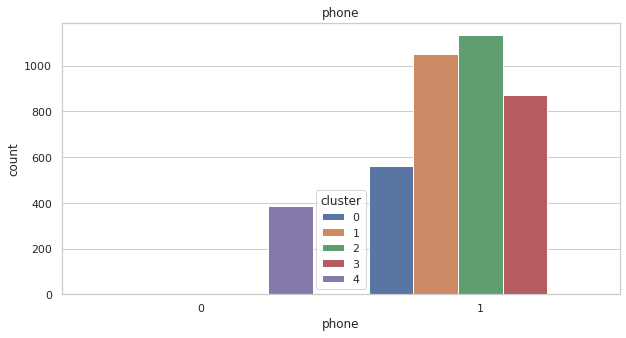

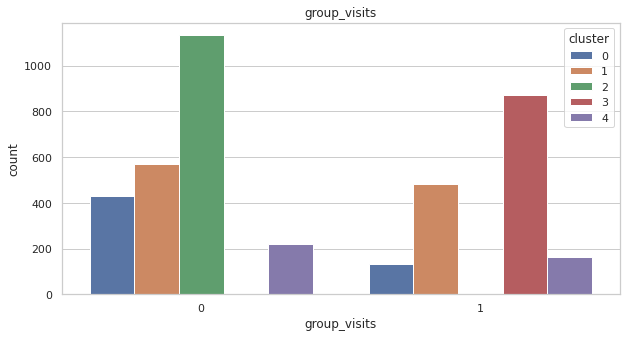

In [35]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(10, 5))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

**Для небинарных признаков**

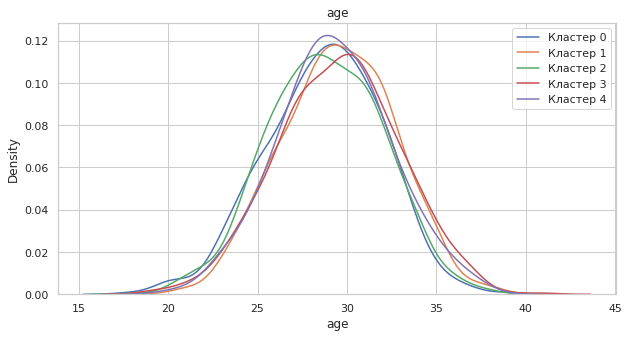

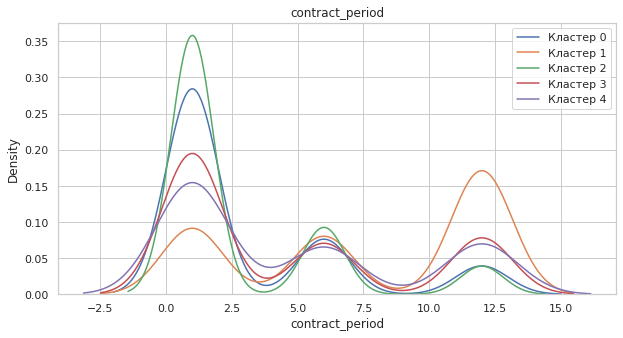

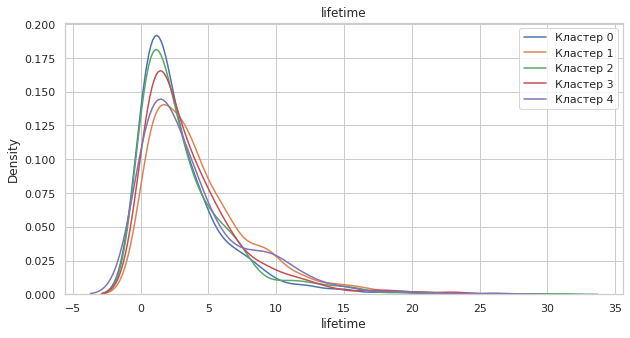

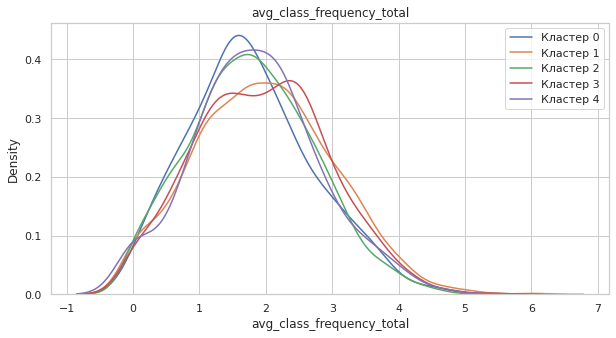

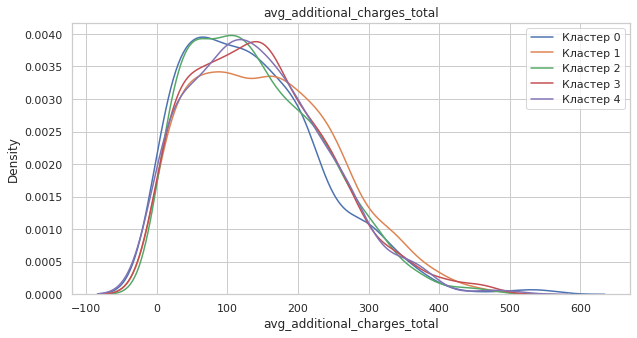

In [36]:
for column in ['age', 'contract_period', 'lifetime', 'avg_class_frequency_total', 'avg_additional_charges_total']:
    plt.figure(figsize=(10, 5))
    plt.title(column)   
    sns.kdeplot(df.query('cluster==0')[column], label = 'Кластер 0')
    sns.kdeplot(df.query('cluster==1')[column], label = 'Кластер 1')
    sns.kdeplot(df.query('cluster==2')[column], label = 'Кластер 2')
    sns.kdeplot(df.query('cluster==3')[column], label = 'Кластер 3')
    sns.kdeplot(df.query('cluster==4')[column], label = 'Кластер 4')
    
    sns.set_style('whitegrid')
    plt.legend()
    plt.show()

# Вывод:
По полученным графикам по кластерам убедились, что клиент, попадающий в отток: проживает в другом районе от фитнес-центра, покупает абонемент на недолгосрочный период, не посещает групповые занятия, не является сотрудником компании-партнера клуба, не был участниками акции "Приведи друга"

### Доля оттока

In [37]:
df.groupby('cluster').agg({'churn':'mean'}).sort_values(by='churn')

,churn
cluster,
1,0.12
3,0.20
4,0.27
2,0.38
0,0.40


# Вывод:
Посчитав долю оттока, еще раз убеждаемся, что кластер под номером 1 - является самым надежным, у него самый низкий процент оттока клиентов - 12%, самый высокий процент оттока у кластера под номером 0 и составляет - 40%, он является самым неустойчивым, склонным к оттоку.

## Общий вывод

При исследовательском анализе фитнес-центра, целью которого было разработать стратегию взаимодействия с клиентами, а именно подготовить план действий по удержанию клиентов, имея аналитические данные о клиентах и информацию, связанную с ними, убедились, что полученные данные готовы к обучению и дальнейшему анализу, выполнили незначительные действия: привели названия столбцов к нижнему регистру, округлили средние значения до сотых и привели столбец со сроком окончания абонемента к целочисленному типу данных. После этого данные были полностью готовы к дальнейшей работе.

При первичном анализе EDA установили, что:
- Распределение между мужчинами и женщинами одинаково
- Большинство клиентов (85%) живет или работает рядом с фитнес-центром
- Примерно половина клиентов являются сотрудниками партнерских организаций
- Около 30% клиентов пришли по программе "Приведи друга, что составляет довольно малую долю
- Мобильные номера записаны практически для всех клиентов
- Средняя длительность абонементов клиентов - разброс очень большой(стандратное отклонение)
- Около 40% клиентов посещают групповые занятия
- Средний возраст клиентов 29 лет
- Средние выручка с доп.услуг фитнес-центра - 146, максимальная выручка - 500
- Среднее время с момента первого обращения в фитнес-центр - 4 месяца
- Средняя частота посещений за все время - 1-2 раза в неделю
- Средняя частота посещений за последний месяц - 1-2 раза в неделю
- **Доля оттока - 27%**

***В отток попадают клиенты:***

- Живущие и работающие в других районах
- Сотрудники компаний, не входящие в партнерскую программу
- В среднем занимаются около месяца
- Редко посещают групповые тренировки

И выдвинули несколько гипотез:

Клиенты в оттоке живут или работают в других районах и им неудобно добираться до фитнес-центра, возможно они купили пробный абонемент по выгодным условиям, но из-за неудобства расположения, они вынуждены были перейти в другие фитнес-клубы.

Вторая гипотеза: Клиент, придя в фитнес-центр, купил пробный абонемент на месяц, в процессе занятий его не устроил ряд факторов, повлиявших на его решение поменять клуб. Также может не сработать маркетинг, удержание клиента на низком уровне, нет специальных предложений для новичков, акций/скидок, которые могли бы его заинтересовать для продолжения занятий именно в этом фитнес-клубе.

Была построена модель прогноза оттока клиентов, лучшим по полученным результатам оказался алгоритм Случайный лес, также модель была обучена с помощью алгоритма Логистической регрессии, который тоже показал неплохие результаты.

Далее была обучена модель кластеризации с помощью алгоритма K-Means, клиенты были разделены на 5 кластеров. Лучшим показал себя 1-ый кластер, его характеристики:

- Отток - 12% - самый низкий
- Живут или работают недалеко от фитнес-центра
- Преобладают сотрудники компаний-партнеров - 96%
- Заключают абонементы на длительный срок - 8 месяцев
- Чаще всех посещают групповые занятия - 46%
- Больше всех пришли по акции "Приведи друга"

# Рекомендации
На основе полученных результатов фитнес-центру предлагается усилить маркетинг, сделать упор на привлечение новых клиентов, разработать акции/скидки/интересные предложения для клиентов, которые пришли в фитнес-клуб впервые, чтобы они захотели заниматься именно у вас. Сделать упор на групповые занятия, например, предложить несколько занятий бесплатно, больше привлекать клиентов по акции "Приведи друга", ведь тогда мотивация у клиентов становится только больше заниматься со своими знакомыми и наблюдать не только свои результаты, но и своих друзей. Также сделать акции на долгосрочные абонементы, ведь как выяснилось, что клиенты с абонементами на месяц больше уходят в отток. Усиливать мотивацию клиентов, создать комфортные условия для занятий, создать дружескую атмосферу внутри клуба  - это то, что сможет остановить отток клиентов.